In [1]:
%matplotlib inline

import os
import math
import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

PROJECTS = ['ant-ivy', 'archiva', 'calcite', 'cayenne', 'commons-bcel', 'commons-beanutils',
            'commons-codec', 'commons-collections', 'commons-compress', 'commons-configuration',
            'commons-dbcp', 'commons-digester', 'commons-io', 'commons-jcs', 'commons-jexl',
            'commons-lang', 'commons-math', 'commons-net', 'commons-scxml', 
            'commons-validator', 'commons-vfs', 'deltaspike', 'eagle', 'giraph', 'gora', 'jspwiki',
            'knox', 'kylin', 'lens', 'mahout', 'manifoldcf','nutch','opennlp','parquet-mr',
            'santuario-java', 'systemml', 'tika', 'wss4j']

# Static Source Code Metrics from Sourcemeter homepage https://www.sourcemeter.com/resources/java/ 2018-07-24
STATIC = ['PDA', 'LOC', 'CLOC', 'PUA', 'McCC', 'LLOC',  'LDC', 'NOS', 'MISM', 'CCL', 'TNOS', 'TLLOC',
          'NLE', 'CI', 'HPL', 'MI', 'HPV', 'CD', 'NOI', 'NUMPAR', 'MISEI', 'CC', 'LLDC', 'NII', 'CCO', 'CLC', 'TCD', 'NL', 'TLOC',  'CLLC', 'TCLOC', 'MIMS', 'HDIF', 'DLOC', 'NLM', 'DIT', 'NPA', 'TNLPM', 
          'TNLA', 'NLA', 'AD', 'TNLPA', 'NM', 'TNG', 'NLPM', 'TNM', 'NOC', 'NOD', 'NOP', 'NLS', 'NG', 'TNLG', 'CBOI', 'RFC', 'NLG', 'TNLS', 'TNA', 'NLPA', 'NOA', 'WMC', 'NPM', 'TNPM', 'TNS', 'NA', 'LCOM5', 'NS', 'CBO', 'TNLM', 'TNPA']
PMD_RULES = [{'type': 'Basic Rules', 'rule': 'Avoid Branching Statement As Last In Loop', 'abbrev': 'PMD_ABSALIL', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Avoid Decimal Literals In Big Decimal Constructor', 'abbrev': 'PMD_ADLIBDC', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Avoid Multiple Unary Operators', 'abbrev': 'PMD_AMUO', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Avoid Thread Group', 'abbrev': 'PMD_ATG', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Avoid Using Hard Coded IP', 'abbrev': 'PMD_AUHCIP', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Avoid Using Octal Values', 'abbrev': 'PMD_AUOV', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Big Integer Instantiation', 'abbrev': 'PMD_BII', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Boolean Instantiation', 'abbrev': 'PMD_BI', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Broken Null Check', 'abbrev': 'PMD_BNC', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Check Result Set', 'abbrev': 'PMD_CRS', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Check Skip Result', 'abbrev': 'PMD_CSR', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Class Cast Exception With To Array', 'abbrev': 'PMD_CCEWTA', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Collapsible If Statements', 'abbrev': 'PMD_CIS', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Dont Call Thread Run', 'abbrev': 'PMD_DCTR', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Dont Use Float Type For Loop Indices', 'abbrev': 'PMD_DUFTFLI', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Double Checked Locking', 'abbrev': 'PMD_DCL', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Empty Catch Block', 'abbrev': 'PMD_ECB', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Empty Finally Block', 'abbrev': 'PMD_EFB', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Empty If Stmt', 'abbrev': 'PMD_EIS', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Empty Statement Block', 'abbrev': 'PMD_EmSB', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Empty Statement Not In Loop', 'abbrev': 'PMD_ESNIL', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Empty Static Initializer', 'abbrev': 'PMD_ESI', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Empty Switch Statements', 'abbrev': 'PMD_ESS', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Empty Synchronized Block', 'abbrev': 'PMD_ESB', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Empty Try Block', 'abbrev': 'PMD_ETB', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Empty While Stmt', 'abbrev': 'PMD_EWS', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Extends Object', 'abbrev': 'PMD_EO', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'For Loop Should Be While Loop', 'abbrev': 'PMD_FLSBWL', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Jumbled Incrementer', 'abbrev': 'PMD_JI', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Misplaced Null Check', 'abbrev': 'PMD_MNC', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Override Both Equals And Hashcode', 'abbrev': 'PMD_OBEAH', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Return From Finally Block', 'abbrev': 'PMD_RFFB', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Unconditional If Statement', 'abbrev': 'PMD_UIS', 'severity': 'Major'}, {'type': 'Basic Rules', 'rule': 'Unnecessary Conversion Temporary', 'abbrev': 'PMD_UCT', 'severity': 'Minor'}, {'type': 'Basic Rules', 'rule': 'Unused Null Check In Equals', 'abbrev': 'PMD_UNCIE', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Useless Operation On Immutable', 'abbrev': 'PMD_UOOI', 'severity': 'Critical'}, {'type': 'Basic Rules', 'rule': 'Useless Overriding Method', 'abbrev': 'PMD_UOM', 'severity': 'Minor'}, {'type': 'Brace Rules', 'rule': 'For Loops Must Use Braces', 'abbrev': 'PMD_FLMUB', 'severity': 'Minor'}, {'type': 'Brace Rules', 'rule': 'If Else Stmts Must Use Braces', 'abbrev': 'PMD_IESMUB', 'severity': 'Minor'}, {'type': 'Brace Rules', 'rule': 'If Stmts Must Use Braces', 'abbrev': 'PMD_ISMUB', 'severity': 'Minor'}, {'type': 'Brace Rules', 'rule': 'While Loops Must Use Braces', 'abbrev': 'PMD_WLMUB', 'severity': 'Minor'}, {'type': 'Clone Implementation Rules', 'rule': 'Clone Throws Clone Not Supported Exception', 'abbrev': 'PMD_CTCNSE', 'severity': 'Major'}, {'type': 'Clone Implementation Rules', 'rule': 'Proper Clone Implementation', 'abbrev': 'PMD_PCI', 'severity': 'Critical'}, {'type': 'Controversial Rules', 'rule': 'Assignment In Operand', 'abbrev': 'PMD_AIO', 'severity': 'Minor'}, {'type': 'Controversial Rules', 'rule': 'Avoid Accessibility Alteration', 'abbrev': 'PMD_AAA', 'severity': 'Major'}, {'type': 'Controversial Rules', 'rule': 'Avoid Prefixing Method Parameters', 'abbrev': 'PMD_APMP', 'severity': 'Minor'}, {'type': 'Controversial Rules', 'rule': 'Avoid Using Native Code', 'abbrev': 'PMD_AUNC', 'severity': 'Major'}, {'type': 'Controversial Rules', 'rule': 'Default Package', 'abbrev': 'PMD_DP', 'severity': 'Minor'}, {'type': 'Controversial Rules', 'rule': 'Do Not Call Garbage Collection Explicitly', 'abbrev': 'PMD_DNCGCE', 'severity': 'Major'}, {'type': 'Controversial Rules', 'rule': 'Dont Import Sun', 'abbrev': 'PMD_DIS', 'severity': 'Major'}, {'type': 'Controversial Rules', 'rule': 'One Declaration Per Line', 'abbrev': 'PMD_ODPL', 'severity': 'Minor'}, {'type': 'Controversial Rules', 'rule': 'Suspicious Octal Escape', 'abbrev': 'PMD_SOE', 'severity': 'Major'}, {'type': 'Controversial Rules', 'rule': 'Unnecessary Constructor', 'abbrev': 'PMD_UC', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Abstract Class Without Abstract Method', 'abbrev': 'PMD_ACWAM', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Abstract Class Without Any Method', 'abbrev': 'PMD_AbCWAM', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Assignment To Non Final Static', 'abbrev': 'PMD_ATNFS', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Avoid Constants Interface', 'abbrev': 'PMD_ACI', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Avoid Instanceof Checks In Catch Clause', 'abbrev': 'PMD_AICICC', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Avoid Protected Field In Final Class', 'abbrev': 'PMD_APFIFC', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Avoid Protected Method In Final Class Not Extending', 'abbrev': 'PMD_APMIFCNE', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Avoid Reassigning Parameters', 'abbrev': 'PMD_ARP', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Avoid Synchronized At Method Level', 'abbrev': 'PMD_ASAML', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Bad Comparison', 'abbrev': 'PMD_BC', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Class With Only Private Constructors Should Be Final', 'abbrev': 'PMD_CWOPCSBF', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Close Resource', 'abbrev': 'PMD_ClR', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Constructor Calls Overridable Method', 'abbrev': 'PMD_CCOM', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Default Label Not Last In Switch Stmt', 'abbrev': 'PMD_DLNLISS', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Empty Method In Abstract Class Should Be Abstract', 'abbrev': 'PMD_EMIACSBA', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Equals Null', 'abbrev': 'PMD_EN', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Field Declarations Should Be At Start Of Class', 'abbrev': 'PMD_FDSBASOC', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Final Field Could Be Static', 'abbrev': 'PMD_FFCBS', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Idempotent Operations', 'abbrev': 'PMD_IO', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Immutable Field', 'abbrev': 'PMD_IF', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Instantiation To Get Class', 'abbrev': 'PMD_ITGC', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Logic Inversion', 'abbrev': 'PMD_LI', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Missing Break In Switch', 'abbrev': 'PMD_MBIS', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Missing Static Method In Non Instantiatable Class', 'abbrev': 'PMD_MSMINIC', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Non Case Label In Switch Statement', 'abbrev': 'PMD_NCLISS', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Non Static Initializer', 'abbrev': 'PMD_NSI', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Non Thread Safe Singleton', 'abbrev': 'PMD_NTSS', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Optimizable To Array Call', 'abbrev': 'PMD_OTAC', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Position Literals First In Case Insensitive Comparisons', 'abbrev': 'PMD_PLFICIC', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Position Literals First In Comparisons', 'abbrev': 'PMD_PLFIC', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Preserve Stack Trace', 'abbrev': 'PMD_PST', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Return Empty Array Rather Than Null', 'abbrev': 'PMD_REARTN', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Simple Date Format Needs Locale', 'abbrev': 'PMD_SDFNL', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Simplify Boolean Expressions', 'abbrev': 'PMD_SBE', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Simplify Boolean Returns', 'abbrev': 'PMD_SBR', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Simplify Conditional', 'abbrev': 'PMD_SC', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Singular Field', 'abbrev': 'PMD_SF', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Switch Stmts Should Have Default', 'abbrev': 'PMD_SSSHD', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Too Few Branches For ASwitch Statement', 'abbrev': 'PMD_TFBFASS', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Uncommented Empty Constructor', 'abbrev': 'PMD_UEC', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Uncommented Empty Method', 'abbrev': 'PMD_UEM', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Unnecessary Local Before Return', 'abbrev': 'PMD_ULBR', 'severity': 'Minor'}, {'type': 'Design Rules', 'rule': 'Unsynchronized Static Date Formatter', 'abbrev': 'PMD_USDF', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Use Collection Is Empty', 'abbrev': 'PMD_UCIE', 'severity': 'Major'}, {'type': 'Design Rules', 'rule': 'Use Locale With Case Conversions', 'abbrev': 'PMD_ULWCC', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Use Notify All Instead Of Notify', 'abbrev': 'PMD_UNAION', 'severity': 'Critical'}, {'type': 'Design Rules', 'rule': 'Use Varargs', 'abbrev': 'PMD_UV', 'severity': 'Minor'}, {'type': 'Finalizer Rules', 'rule': 'Avoid Calling Finalize', 'abbrev': 'PMD_ACF', 'severity': 'Major'}, {'type': 'Finalizer Rules', 'rule': 'Empty Finalizer', 'abbrev': 'PMD_EF', 'severity': 'Minor'}, {'type': 'Finalizer Rules', 'rule': 'Finalize Does Not Call Super Finalize', 'abbrev': 'PMD_FDNCSF', 'severity': 'Critical'}, {'type': 'Finalizer Rules', 'rule': 'Finalize Only Calls Super Finalize', 'abbrev': 'PMD_FOCSF', 'severity': 'Minor'}, {'type': 'Finalizer Rules', 'rule': 'Finalize Overloaded', 'abbrev': 'PMD_FO', 'severity': 'Critical'}, {'type': 'Finalizer Rules', 'rule': 'Finalize Should Be Protected', 'abbrev': 'PMD_FSBP', 'severity': 'Critical'}, {'type': 'Import Statement Rules', 'rule': 'Dont Import Java Lang', 'abbrev': 'PMD_DIJL', 'severity': 'Minor'}, {'type': 'Import Statement Rules', 'rule': 'Duplicate Imports', 'abbrev': 'PMD_DI', 'severity': 'Minor'}, {'type': 'Import Statement Rules', 'rule': 'Import From Same Package', 'abbrev': 'PMD_IFSP', 'severity': 'Minor'}, {'type': 'Import Statement Rules', 'rule': 'Too Many Static Imports', 'abbrev': 'PMD_TMSI', 'severity': 'Major'}, {'type': 'Import Statement Rules', 'rule': 'Unnecessary Fully Qualified Name', 'abbrev': 'PMD_UFQN', 'severity': 'Minor'}, {'type': 'J2EE Rules', 'rule': 'Do Not Call System Exit', 'abbrev': 'PMD_DNCSE', 'severity': 'Critical'}, {'type': 'J2EE Rules', 'rule': 'Local Home Naming Convention', 'abbrev': 'PMD_LHNC', 'severity': 'Major'}, {'type': 'J2EE Rules', 'rule': 'Local Interface Session Naming Convention', 'abbrev': 'PMD_LISNC', 'severity': 'Major'}, {'type': 'J2EE Rules', 'rule': 'MDBAnd Session Bean Naming Convention', 'abbrev': 'PMD_MDBASBNC', 'severity': 'Major'}, {'type': 'J2EE Rules', 'rule': 'Remote Interface Naming Convention', 'abbrev': 'PMD_RINC', 'severity': 'Major'}, {'type': 'J2EE Rules', 'rule': 'Remote Session Interface Naming Convention', 'abbrev': 'PMD_RSINC', 'severity': 'Major'}, {'type': 'J2EE Rules', 'rule': 'Static EJBField Should Be Final', 'abbrev': 'PMD_SEJBFSBF', 'severity': 'Critical'}, {'type': 'JUnit Rules', 'rule': 'JUnit Assertions Should Include Message', 'abbrev': 'PMD_JUASIM', 'severity': 'Minor'}, {'type': 'JUnit Rules', 'rule': 'JUnit Spelling', 'abbrev': 'PMD_JUS', 'severity': 'Critical'}, {'type': 'JUnit Rules', 'rule': 'JUnit Static Suite', 'abbrev': 'PMD_JUSS', 'severity': 'Critical'}, {'type': 'JUnit Rules', 'rule': 'JUnit Test Contains Too Many Asserts', 'abbrev': 'PMD_JUTCTMA', 'severity': 'Minor'}, {'type': 'JUnit Rules', 'rule': 'JUnit Tests Should Include Assert', 'abbrev': 'PMD_JUTSIA', 'severity': 'Major'}, {'type': 'JUnit Rules', 'rule': 'Simplify Boolean Assertion', 'abbrev': 'PMD_SBA', 'severity': 'Minor'}, {'type': 'JUnit Rules', 'rule': 'Test Class Without Test Cases', 'abbrev': 'PMD_TCWTC', 'severity': 'Minor'}, {'type': 'JUnit Rules', 'rule': 'Unnecessary Boolean Assertion', 'abbrev': 'PMD_UBA', 'severity': 'Minor'}, {'type': 'JUnit Rules', 'rule': 'Use Assert Equals Instead Of Assert True', 'abbrev': 'PMD_UAEIOAT', 'severity': 'Major'}, {'type': 'JUnit Rules', 'rule': 'Use Assert Null Instead Of Assert True', 'abbrev': 'PMD_UANIOAT', 'severity': 'Minor'}, {'type': 'JUnit Rules', 'rule': 'Use Assert Same Instead Of Assert True', 'abbrev': 'PMD_UASIOAT', 'severity': 'Minor'}, {'type': 'JUnit Rules', 'rule': 'Use Assert True Instead Of Assert Equals', 'abbrev': 'PMD_UATIOAE', 'severity': 'Minor'}, {'type': 'Jakarta Commons Logging Rules', 'rule': 'Guard Debug Logging', 'abbrev': 'PMD_GDL', 'severity': 'Major'}, {'type': 'Jakarta Commons Logging Rules', 'rule': 'Guard Log Statement', 'abbrev': 'PMD_GLS', 'severity': 'Minor'}, {'type': 'Jakarta Commons Logging Rules', 'rule': 'Proper Logger', 'abbrev': 'PMD_PL', 'severity': 'Minor'}, {'type': 'Jakarta Commons Logging Rules', 'rule': 'Use Correct Exception Logging', 'abbrev': 'PMD_UCEL', 'severity': 'Major'}, {'type': 'Java Logging Rules', 'rule': 'Avoid Print Stack Trace', 'abbrev': 'PMD_APST', 'severity': 'Major'}, {'type': 'Java Logging Rules', 'rule': 'Guard Log Statement Java Util', 'abbrev': 'PMD_GLSJU', 'severity': 'Minor'}, {'type': 'Java Logging Rules', 'rule': 'Logger Is Not Static Final', 'abbrev': 'PMD_LINSF', 'severity': 'Minor'}, {'type': 'Java Logging Rules', 'rule': 'More Than One Logger', 'abbrev': 'PMD_MTOL', 'severity': 'Major'}, {'type': 'Java Logging Rules', 'rule': 'System Println', 'abbrev': 'PMD_SP', 'severity': 'Major'}, {'type': 'JavaBean Rules', 'rule': 'Missing Serial Version UID', 'abbrev': 'PMD_MSVUID', 'severity': 'Major'}, {'type': 'Naming Rules', 'rule': 'Avoid Dollar Signs', 'abbrev': 'PMD_ADS', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Avoid Field Name Matching Method Name', 'abbrev': 'PMD_AFNMMN', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Avoid Field Name Matching Type Name', 'abbrev': 'PMD_AFNMTN', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Boolean Get Method Name', 'abbrev': 'PMD_BGMN', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Class Naming Conventions', 'abbrev': 'PMD_CNC', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Generics Naming', 'abbrev': 'PMD_GN', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Method Naming Conventions', 'abbrev': 'PMD_MeNC', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Method With Same Name As Enclosing Class', 'abbrev': 'PMD_MWSNAEC', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'No Package', 'abbrev': 'PMD_NP', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Package Case', 'abbrev': 'PMD_PC', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Short Class Name', 'abbrev': 'PMD_SCN', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Short Method Name', 'abbrev': 'PMD_SMN', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Suspicious Constant Field Name', 'abbrev': 'PMD_SCFN', 'severity': 'Minor'}, {'type': 'Naming Rules', 'rule': 'Suspicious Equals Method Name', 'abbrev': 'PMD_SEMN', 'severity': 'Critical'}, {'type': 'Naming Rules', 'rule': 'Suspicious Hashcode Method Name', 'abbrev': 'PMD_SHMN', 'severity': 'Critical'}, {'type': 'Naming Rules', 'rule': 'Variable Naming Conventions', 'abbrev': 'PMD_VNC', 'severity': 'Minor'}, {'type': 'Optimization Rules', 'rule': 'Add Empty String', 'abbrev': 'PMD_AES', 'severity': 'Minor'}, {'type': 'Optimization Rules', 'rule': 'Avoid Array Loops', 'abbrev': 'PMD_AAL', 'severity': 'Major'}, {'type': 'Optimization Rules', 'rule': 'Redundant Field Initializer', 'abbrev': 'PMD_RFI', 'severity': 'Minor'}, {'type': 'Optimization Rules', 'rule': 'Unnecessary Wrapper Object Creation', 'abbrev': 'PMD_UWOC', 'severity': 'Major'}, {'type': 'Optimization Rules', 'rule': 'Use Array List Instead Of Vector', 'abbrev': 'PMD_UALIOV', 'severity': 'Minor'}, {'type': 'Optimization Rules', 'rule': 'Use Arrays As List', 'abbrev': 'PMD_UAAL', 'severity': 'Major'}, {'type': 'Optimization Rules', 'rule': 'Use String Buffer For String Appends', 'abbrev': 'PMD_USBFSA', 'severity': 'Major'}, {'type': 'Security Code Guideline Rules', 'rule': 'Array Is Stored Directly', 'abbrev': 'PMD_AISD', 'severity': 'Major'}, {'type': 'Security Code Guideline Rules', 'rule': 'Method Returns Internal Array', 'abbrev': 'PMD_MRIA', 'severity': 'Major'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Catching Generic Exception', 'abbrev': 'PMD_ACGE', 'severity': 'Major'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Catching NPE', 'abbrev': 'PMD_ACNPE', 'severity': 'Critical'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Catching Throwable', 'abbrev': 'PMD_ACT', 'severity': 'Major'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Losing Exception Information', 'abbrev': 'PMD_ALEI', 'severity': 'Major'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Rethrowing Exception', 'abbrev': 'PMD_ARE', 'severity': 'Minor'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Throwing New Instance Of Same Exception', 'abbrev': 'PMD_ATNIOSE', 'severity': 'Minor'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Throwing Null Pointer Exception', 'abbrev': 'PMD_ATNPE', 'severity': 'Critical'}, {'type': 'Strict Exception Rules', 'rule': 'Avoid Throwing Raw Exception Types', 'abbrev': 'PMD_ATRET', 'severity': 'Major'}, {'type': 'Strict Exception Rules', 'rule': 'Do Not Extend Java Lang Error', 'abbrev': 'PMD_DNEJLE', 'severity': 'Critical'}, {'type': 'Strict Exception Rules', 'rule': 'Do Not Throw Exception In Finally', 'abbrev': 'PMD_DNTEIF', 'severity': 'Critical'}, {'type': 'Strict Exception Rules', 'rule': 'Exception As Flow Control', 'abbrev': 'PMD_EAFC', 'severity': 'Major'}, {'type': 'String and StringBuffer Rules', 'rule': 'Avoid Duplicate Literals', 'abbrev': 'PMD_ADL', 'severity': 'Major'}, {'type': 'String and StringBuffer Rules', 'rule': 'Avoid String Buffer Field', 'abbrev': 'PMD_ASBF', 'severity': 'Minor'}, {'type': 'String and StringBuffer Rules', 'rule': 'Consecutive Appends Should Reuse', 'abbrev': 'PMD_CASR', 'severity': 'Minor'}, {'type': 'String and StringBuffer Rules', 'rule': 'Consecutive Literal Appends', 'abbrev': 'PMD_CLA', 'severity': 'Minor'}, {'type': 'String and StringBuffer Rules', 'rule': 'Inefficient String Buffering', 'abbrev': 'PMD_ISB', 'severity': 'Minor'}, {'type': 'String and StringBuffer Rules', 'rule': 'String Buffer Instantiation With Char', 'abbrev': 'PMD_SBIWC', 'severity': 'Critical'}, {'type': 'String and StringBuffer Rules', 'rule': 'String Instantiation', 'abbrev': 'PMD_StI', 'severity': 'Minor'}, {'type': 'String and StringBuffer Rules', 'rule': 'String To String', 'abbrev': 'PMD_STS', 'severity': 'Minor'}, {'type': 'String and StringBuffer Rules', 'rule': 'Unnecessary Case Change', 'abbrev': 'PMD_UCC', 'severity': 'Minor'}, {'type': 'String and StringBuffer Rules', 'rule': 'Use Equals To Compare Strings', 'abbrev': 'PMD_UETCS', 'severity': 'Critical'}, {'type': 'Type Resolution Rules', 'rule': 'Clone Method Must Implement Cloneable', 'abbrev': 'PMD_ClMMIC', 'severity': 'Major'}, {'type': 'Type Resolution Rules', 'rule': 'Loose Coupling', 'abbrev': 'PMD_LoC', 'severity': 'Major'}, {'type': 'Type Resolution Rules', 'rule': 'Signature Declare Throws Exception', 'abbrev': 'PMD_SiDTE', 'severity': 'Major'}, {'type': 'Type Resolution Rules', 'rule': 'Unused Imports', 'abbrev': 'PMD_UnI', 'severity': 'Minor'}, {'type': 'Unnecessary and Unused Code Rules', 'rule': 'Unused Local Variable', 'abbrev': 'PMD_ULV', 'severity': 'Major'}, {'type': 'Unnecessary and Unused Code Rules', 'rule': 'Unused Private Field', 'abbrev': 'PMD_UPF', 'severity': 'Major'}, {'type': 'Unnecessary and Unused Code Rules', 'rule': 'Unused Private Method', 'abbrev': 'PMD_UPM', 'severity': 'Major'}]
JIT_FEATURES = ['comm', 'adev', 'add', 'del', 'own', 'minor', 'sctr', 'nadev', 'ncomm', 'nsctr', 'oexp', 'exp', 'nd', 'entropy', 'la', 'ld', 'lt', 'age', 'nuc', 'cexp', 'sexp', 'rexp', 'fix_bug']

STATIC_FEATURES = []
for f in STATIC:
    STATIC_FEATURES.append('parent_' + f)
    STATIC_FEATURES.append('current_' + f)
    STATIC_FEATURES.append('delta_' + f)
PMD_FEATURES = []
for f in PMD_RULES:
    PMD_FEATURES.append('parent_' + f['abbrev'])
    PMD_FEATURES.append('current_' + f['abbrev'])
    PMD_FEATURES.append('delta_' + f['abbrev'])
PMD_FEATURES += ['file_system_sum_WD', 'author_delta_sum_WD', 'system_WD']

DATA_PATH = '../data/'
FIGURES_PATH = '../figures/'

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
def get_labels(df, boundary_date=None):
    labels_adhoc = {}
    labels_bug = {}
    for idx, row in df.iterrows():
        labels_adhoc[idx] = 0
        labels_bug[idx] = 0
        for key in df.columns:
            if key.startswith('adhoc') and len(key.split('__')) > 2 and row[key] == 1:  # we hit the bug matrix with bug for which ROW is inducing
                tripel = key.split('__')  # issue-id_bugfix-revision_bugfix-date
                bugfix_date = pd.to_datetime(tripel[-1])
                labels_adhoc[idx] = 1
            if not key.startswith('adhoc') and len(key.split('__')) > 2 and row[key] == 1:
                tripel = key.split('__')
                bugfix_date = pd.to_datetime(tripel[-1])
                labels_bug[idx] = 1
    return list(labels_adhoc.values()), list(labels_bug.values())

def get_bug_fixes_days(df):    
    pairs = set()
    for idx, row in df.iterrows():
        for key in df.columns:
            if not key.startswith('adhoc') and len(key.split('__')) > 2 and row[key] > 0:  # we hit the bug matrix with bug for which ROW is inducing
                tripel = key.split('__')  # issue-id__bugfix-revision__bugfix-date
                inducing_date = row['committer_date']
                bugfix_date = pd.to_datetime(tripel[-1])
                bugfix_date = bugfix_date.replace(tzinfo=inducing_date.tzinfo)
                pairs.add((inducing_date, bugfix_date))

    return [(a[1] - a[0]).days for a in pairs]

def load_project_no_labels(project_name):
    f = '{}/pydriller_{}.csv'.format(DATA_PATH, project_name)
    if project_name not in PROJECTS:
        f = '{}/pydriller_only_{}.csv'.format(DATA_PATH, project_name)
    if os.path.exists(f):
        tmp = pd.read_csv(f)
        tmp['project'] = project_name
        tmp['committer_date'] = pd.to_datetime(tmp['committer_date'])
        tmp = tmp.fillna(0)
        return tmp
    
def load_project(project_name):
    f = '{}/pydriller_{}.csv'.format(DATA_PATH, project_name)
    if os.path.exists(f):
        tmp = pd.read_csv(f)
        tmp['project'] = project_name
        
        adhoc, bug = get_labels(tmp)
        tmp['adhoc_label'] = adhoc
        tmp['bug_label'] = bug
        return tmp

In [3]:
# number of defective to non defective commits /insances
data = []
for project_name in PROJECTS:
    tmp = load_project(project_name)
    
    if tmp is None:
        continue

    tmp['defective_bug'] = tmp['bug_label'] > 0
    tmp['defective_adhoc'] = tmp['adhoc_label'] > 0

    commits = tmp.groupby('commit').min().reset_index()

    bug_percentage_all = np.sum(tmp['defective_bug']) / len(tmp) * 100
    bug_percentage_commits = np.sum(commits['defective_bug'].values) / len(commits) * 100
    adhoc_percentage_all = np.sum(tmp['defective_adhoc']) / len(tmp) * 100
    adhoc_percentage_commits = np.sum(commits['defective_adhoc'].values) / len(commits) * 100
    
    data.append({'project': project_name, 'commits': len(commits), 'instances': len(tmp), 
                 'defective_bug_commits': np.sum(commits['defective_bug'].values), 
                 'defective_bug_instances': np.sum(tmp['defective_bug'].values), 
                 'defective_bug_commits_p': bug_percentage_commits, 
                 'defective_bug_instances_p': bug_percentage_all,
                 'defective_adhoc_commits': np.sum(commits['defective_adhoc'].values), 
                 'defective_adhoc_instances': np.sum(tmp['defective_adhoc'].values), 
                 'defective_adhoc_commits_p': adhoc_percentage_commits, 
                 'defective_adhoc_instances_p': adhoc_percentage_all,
                })

In [4]:
commit_diff = []
instance_diff = []

for d in data:
    commit_diff.append(abs(d['defective_bug_commits'] - d['defective_adhoc_commits']))
    instance_diff.append(abs(d['defective_bug_instances'] - d['defective_adhoc_instances']))

print('mean commit diff', np.mean(commit_diff))
print('mean instance diff', np.mean(instance_diff))

mean commit diff 207.52631578947367
mean instance diff 1673.0263157894738


In [5]:
table = ''
sums = {'commits': 0, 'instances': 0, 'defective_bug_commits': 0, 'defective_bug_instances': 0, 'defective_adhoc_commits': 0, 'defective_adhoc_instances': 0}
for d in data:
    table += r'{} & {} & {:.2f}\% & {:.2f}\% & {} & {:.2f}\% & {:.2f}\%\\'.format(d['project'], d['commits'], d['defective_bug_commits_p'], d['defective_adhoc_commits_p'], d['instances'], d['defective_bug_instances_p'], d['defective_adhoc_instances_p']) + '\n'
    sums['commits'] += d['commits']
    sums['instances'] += d['instances']
    sums['defective_bug_commits'] += d['defective_bug_commits']
    sums['defective_bug_instances'] += d['defective_bug_commits']
    sums['defective_adhoc_commits'] += d['defective_adhoc_commits']
    sums['defective_adhoc_instances'] += d['defective_adhoc_commits']
print(table)

ant-ivy & 1917 & 3.29\% & 25.98\% & 11581 & 4.83\% & 29.91\%\\
archiva & 3873 & 2.89\% & 11.72\% & 23899 & 3.46\% & 12.25\%\\
calcite & 2056 & 1.07\% & 12.89\% & 24653 & 4.53\% & 29.81\%\\
cayenne & 4157 & 1.95\% & 7.60\% & 42203 & 3.18\% & 9.54\%\\
commons-bcel & 957 & 1.57\% & 7.21\% & 10842 & 1.02\% & 10.15\%\\
commons-beanutils & 741 & 1.35\% & 13.09\% & 4760 & 0.82\% & 10.23\%\\
commons-codec & 1093 & 0.73\% & 12.63\% & 3299 & 1.76\% & 14.55\%\\
commons-collections & 2229 & 0.58\% & 8.97\% & 18362 & 0.43\% & 7.26\%\\
commons-compress & 1765 & 2.38\% & 5.38\% & 5026 & 4.12\% & 7.54\%\\
commons-configuration & 2010 & 1.24\% & 8.71\% & 7011 & 2.31\% & 12.22\%\\
commons-dbcp & 1004 & 1.99\% & 21.61\% & 3459 & 2.66\% & 22.95\%\\
commons-digester & 1375 & 0.73\% & 8.44\% & 5684 & 0.48\% & 6.30\%\\
commons-io & 1411 & 1.42\% & 9.99\% & 4912 & 1.71\% & 9.85\%\\
commons-jcs & 942 & 2.02\% & 14.01\% & 10905 & 2.60\% & 20.02\%\\
commons-jexl & 884 & 2.15\% & 15.05\% & 3962 & 5.98\% & 20.92\%

In [6]:
# days between bug-indcing and bug fix for bug label
diffs = {}
for project in PROJECTS:
    if not os.path.exists('{}/pydriller_{}.csv'.format(DATA_PATH, project)):
        print('skipping', project)
        continue
    print(project, end=' ')

    tmp = load_project_no_labels(project)
    print('starting bug fixes', end=' ')
    diffs[project] = get_bug_fixes_days(tmp)
    print('finished')

ant-ivy starting bug fixes finished
archiva starting bug fixes finished
calcite starting bug fixes finished
cayenne starting bug fixes finished
commons-bcel starting bug fixes finished
commons-beanutils starting bug fixes finished
commons-codec starting bug fixes finished
commons-collections starting bug fixes finished
commons-compress starting bug fixes finished
commons-configuration starting bug fixes finished
commons-dbcp starting bug fixes finished
commons-digester starting bug fixes finished
commons-io starting bug fixes finished
commons-jcs starting bug fixes finished
commons-jexl starting bug fixes finished
commons-lang starting bug fixes finished
commons-math starting bug fixes finished
commons-net starting bug fixes finished
commons-scxml starting bug fixes finished
commons-validator starting bug fixes finished
commons-vfs starting bug fixes finished
deltaspike starting bug fixes finished
eagle starting bug fixes finished
giraph starting bug fixes finished
gora starting bug fi

38
7 6


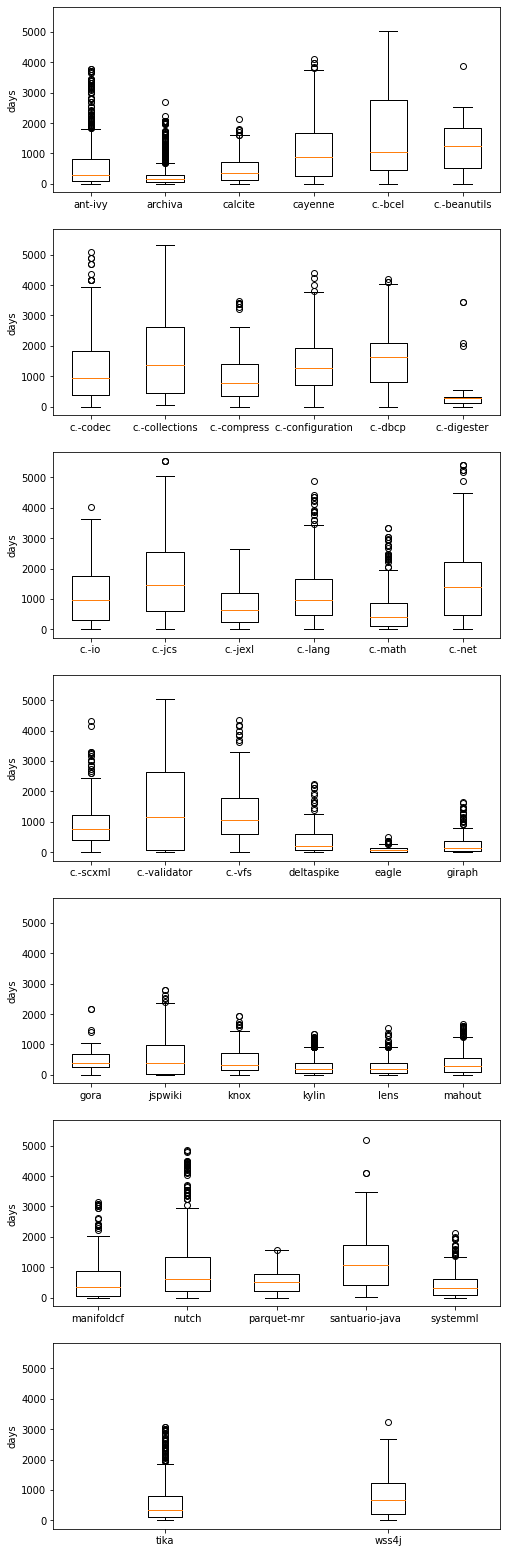

In [7]:
projects = list(diffs.keys())

print(len(projects))
rows = math.ceil((len(projects)) / 6)
cols = 6 # math.ceil(len(projects) / 4 / 6  + 1)

print(rows, cols)

fig, axes = plt.subplots(rows, 1, sharey=True, figsize=(8,rows*4))
fig.suptitle('')


i = 0
for row in range(rows):
    bp = []
    names = []
    for col in range(cols):
        if i == len(projects):
            continue
        name = projects[i]
        i += 1
        
        if name == 'opennlp':
            continue

        abbrev = name.replace('commons-', 'c.-')
        names.append(abbrev)
        bp.append(diffs[name])
        
    axes[row].boxplot(bp)
    axes[row].set(ylabel='days')
    axes[row].set_xticklabels(names)
    #axes[row].label_outer()

#plt.tight_layout()
#plt.savefig(FIGURES_PATH + 'bp_issue_resolution.pdf')
plt.show()

In [8]:
# days between bug-indcing and bug fix for bug label
global_min = datetime.date.today()
global_max = datetime.date(1980, 1, 1)

projects = 0
commits = 0
file_changes = 0
for project in PROJECTS:
    if not os.path.exists('{}/pydriller_{}.csv'.format(DATA_PATH, project)):
        print('skipping', project)
        continue
    print(project, end=' ')
    projects += 1
    tmp = load_project_no_labels(project)
    pmin = tmp['committer_date'].min().date()
    pmax = tmp['committer_date'].max().date()
    
    commits += tmp['commit'].nunique()
    file_changes += len(tmp)

    if pmin < global_min:
        global_min = pmin
    if pmax > global_max:
        global_max = pmax

print('')
print(global_min)
print(global_max)

print('projects', projects)
print('commits', commits)
print('file_changes', file_changes)

ant-ivy archiva calcite cayenne commons-bcel commons-beanutils commons-codec commons-collections commons-compress commons-configuration commons-dbcp commons-digester commons-io commons-jcs commons-jexl commons-lang commons-math commons-net commons-scxml commons-validator commons-vfs deltaspike eagle giraph gora jspwiki knox kylin lens mahout manifoldcf nutch opennlp parquet-mr santuario-java systemml tika wss4j 2001-03-27
2017-12-31
projects 38
commits 73598
file_changes 492241
